1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


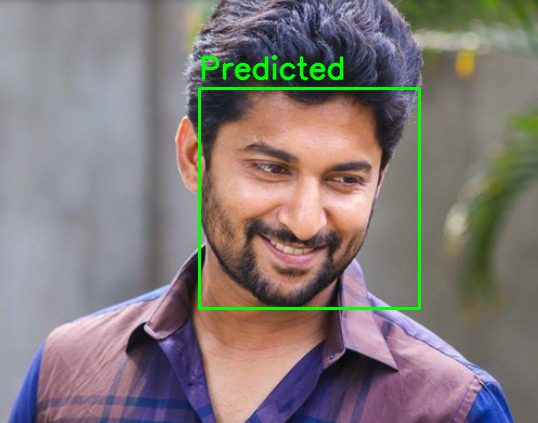

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow

# Load the Haar Cascade Classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def predict_face(model, img):
    # Resize image to the correct dimensions for prediction
    img_resized = cv2.resize(img, (37, 50))
    img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img_resized = np.expand_dims(img_resized, axis=0)  # Add batch dimension
    img_resized = np.expand_dims(img_resized, axis=-1)  # Add channel dimension
    img_resized = img_resized.astype('float32') / 255.0  # Normalize the image

    # Predict the label
    prediction = model.predict(img_resized)
    predicted_label = np.argmax(prediction)
    return predicted_label

# Example usage
img = cv2.imread("Nani.png")

# Check if the image was loaded successfully
if img is None:
    print("Error: Could not load image. Please check the file path and permissions.")
else:
    # Convert image to grayscale for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Loop through each face found and annotate it
    for (x, y, w, h) in faces:
        # Draw a rectangle around the face
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Crop the face region to predict
        face = img[y:y+h, x:x+w]
        predicted_label = predict_face(model, face)

        # Annotate the label near the face
        font = cv2.FONT_HERSHEY_SIMPLEX
        label = f"Predicted"
        cv2.putText(img, label, (x, y - 10), font, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Concatenate the original image and annotated image horizontally
    #combined_img = np.hstack((img, cv2.imread("Nani.png"))) # Removed this line as it is causing an error in my environment.

    # Show the combined image (original on the left, annotated on the right)
    cv2_imshow(img)  # Use cv2_imshow to display the image in Colab